**Importing Libraries**

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

**Importing Data**

In [4]:
#We use pandas for importing data so we use pd.read() function to import data

In [5]:
df_emp =pd.read_csv('C:/Users/satya/Downloads/ml_case_study.csv',header = 0)
df_Cities =pd.read_csv('C:/Users/satya/Downloads/cities.csv',header = 0)
df_Colleges = pd.read_csv('C:/Users/satya/Downloads/Colleges.csv',header = 0)

In [6]:
#To view data we use head 

In [7]:
df_emp.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10


In [8]:
df_Cities.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [9]:
df_Colleges.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


**Data Preprocessing**

In [10]:
#We have colleges list and cities in different file , we have to get metro city and college tier columns data

In [11]:
#Creating Metrocity Variable and its data values

In [12]:
metrocity ={}
for i in df_Cities['Metrio City']:
    metrocity[i] = 'Metro'
for i in df_Cities['non-metro cities']:
    metrocity[i]= 'Non-Metro'

In [13]:
metrocity

{'Mumbai': 'Metro',
 'Delhi': 'Metro',
 'Kolkata': 'Metro',
 'Chennai': 'Metro',
 'Bangalore': 'Metro',
 'Hyderabad': 'Metro',
 'Ahmedabad': 'Metro',
 'Pune': 'Metro',
 'Surat': 'Metro',
 'Dehradun': 'Non-Metro',
 'Durgapur': 'Non-Metro',
 'Asansol': 'Non-Metro',
 'Rourkela': 'Non-Metro',
 'Kozhikode': 'Non-Metro',
 'Rajpur Sonarpur': 'Non-Metro',
 'Kolhapur': 'Non-Metro',
 'Ajmer': 'Non-Metro',
 nan: 'Non-Metro'}

In [14]:
#Mapping it into our emp data 

In [15]:
df_emp['Metrocity'] = df_emp['City'].map(metrocity)

In [16]:
df_emp.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Metrocity
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58,Non-Metro
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87,Non-Metro
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02,Non-Metro
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39,Non-Metro
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10,Non-Metro


In [17]:
#Creating Tier_num varible

In [18]:
college_tier_num = df_Colleges.melt(var_name ='Tier', value_name='College').dropna()

In [19]:
college_tier_num

,Tier,College
0,Tier 1,IIT Bombay
1,Tier 1,IIT Delhi
2,Tier 1,IIT Kharagpur
3,Tier 1,IIT Madras
4,Tier 1,IIT Kanpur
...,...,...
70,Tier 3,"IEM, Kolkata"
71,Tier 3,"Techno India, Kolkata"
72,Tier 3,"Jaypee, Noida"
73,Tier 3,"Amrita University, Coimbatore"


In [20]:
#Replacing with numerical values

In [21]:
college_tier_num['Tier'] = college_tier_num['Tier'].str.replace('Tier','').astype(int)

In [22]:
#Adding it to emp data

In [23]:
df_emp = df_emp.merge(college_tier_num, on= 'College',how ='left')

In [24]:
df_emp.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Metrocity,Tier
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58,Non-Metro,2
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87,Non-Metro,2
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02,Non-Metro,3
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39,Non-Metro,3
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10,Non-Metro,1


In [25]:
#So we got metrocity and tier columns, there is no use of college and city
#Removing college and city columns from emp data

In [26]:
del df_emp['College']

In [27]:
del df_emp['City']

In [28]:
df_emp.head()

,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Metrocity,Tier
0,Manager,55523,3,66,19,71406.58,Non-Metro,2
1,Executive,57081,1,84,18,68005.87,Non-Metro,2
2,Executive,60347,2,52,28,76764.02,Non-Metro,3
3,Executive,49010,2,81,33,82092.39,Non-Metro,3
4,Executive,57879,4,74,32,73878.10,Non-Metro,1


**Handling Categorical Variables**

In [29]:
#We have string values in role and metrocity columns as regression will not able to process string varibles we havee to convert into numericals

In [30]:
#Generating dummies in integer data type

In [31]:
df_emp1 = pd.get_dummies(df_emp, columns=['Role', 'Metrocity'], drop_first = True, dtype = int)
df_emp1.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Tier,Role_Manager,Metrocity_Non-Metro
0,55523,3,66,19,71406.58,2,1,1
1,57081,1,84,18,68005.87,2,0,1
2,60347,2,52,28,76764.02,3,0,1
3,49010,2,81,33,82092.39,3,0,1
4,57879,4,74,32,73878.10,1,0,1


In [32]:
#EDD

In [33]:
df_emp1.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Tier,Role_Manager,Metrocity_Non-Metro
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798,1.975456,0.206419,0.485840
std,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.838330,0.404862,0.499957
min,36990.000000,1.000000,35.000000,18.000000,53020.320000,1.000000,0.000000,0.000000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000,1.000000,0.000000,0.000000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000,2.000000,0.000000,0.000000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000,3.000000,0.000000,1.000000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000,3.000000,1.000000,1.000000


**Handling Missing Value**

In [34]:
#To identify missing values and other related info and treat them

In [35]:
df_emp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Previous CTC         1589 non-null   int64  
 1   Previous job change  1589 non-null   int64  
 2   Graduation Marks     1589 non-null   int64  
 3   EXP (Month)          1589 non-null   int64  
 4   CTC                  1589 non-null   float64
 5   Tier                 1589 non-null   int32  
 6   Role_Manager         1589 non-null   int32  
 7   Metrocity_Non-Metro  1589 non-null   int32  
dtypes: float64(1), int32(3), int64(4)
memory usage: 80.8 KB


In [36]:
#Finding Correleation

In [37]:
df_emp1.corr()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Tier,Role_Manager,Metrocity_Non-Metro
Previous CTC,1.000000,0.005756,-0.032976,0.119163,0.258000,0.041979,0.012321,-0.004644
Previous job change,0.005756,1.000000,0.019267,0.023488,0.011370,-0.055060,-0.017150,-0.051670
Graduation Marks,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.003539,0.017858,0.018616
EXP (Month),0.119163,0.023488,-0.057061,1.000000,0.301115,0.011752,-0.026751,0.023613
CTC,0.258000,0.011370,-0.005450,0.301115,1.000000,-0.029592,0.621311,0.020365
Tier,0.041979,-0.055060,0.003539,0.011752,-0.029592,1.000000,-0.014749,0.014946
Role_Manager,0.012321,-0.017150,0.017858,-0.026751,0.621311,-0.014749,1.000000,0.048671
Metrocity_Non-Metro,-0.004644,-0.051670,0.018616,0.023613,0.020365,0.014946,0.048671,1.000000


**Finding and Handling Outliers**

In [38]:
#simple way to identify outlier is to plotting the graphs 

**Plotting The Graphs**

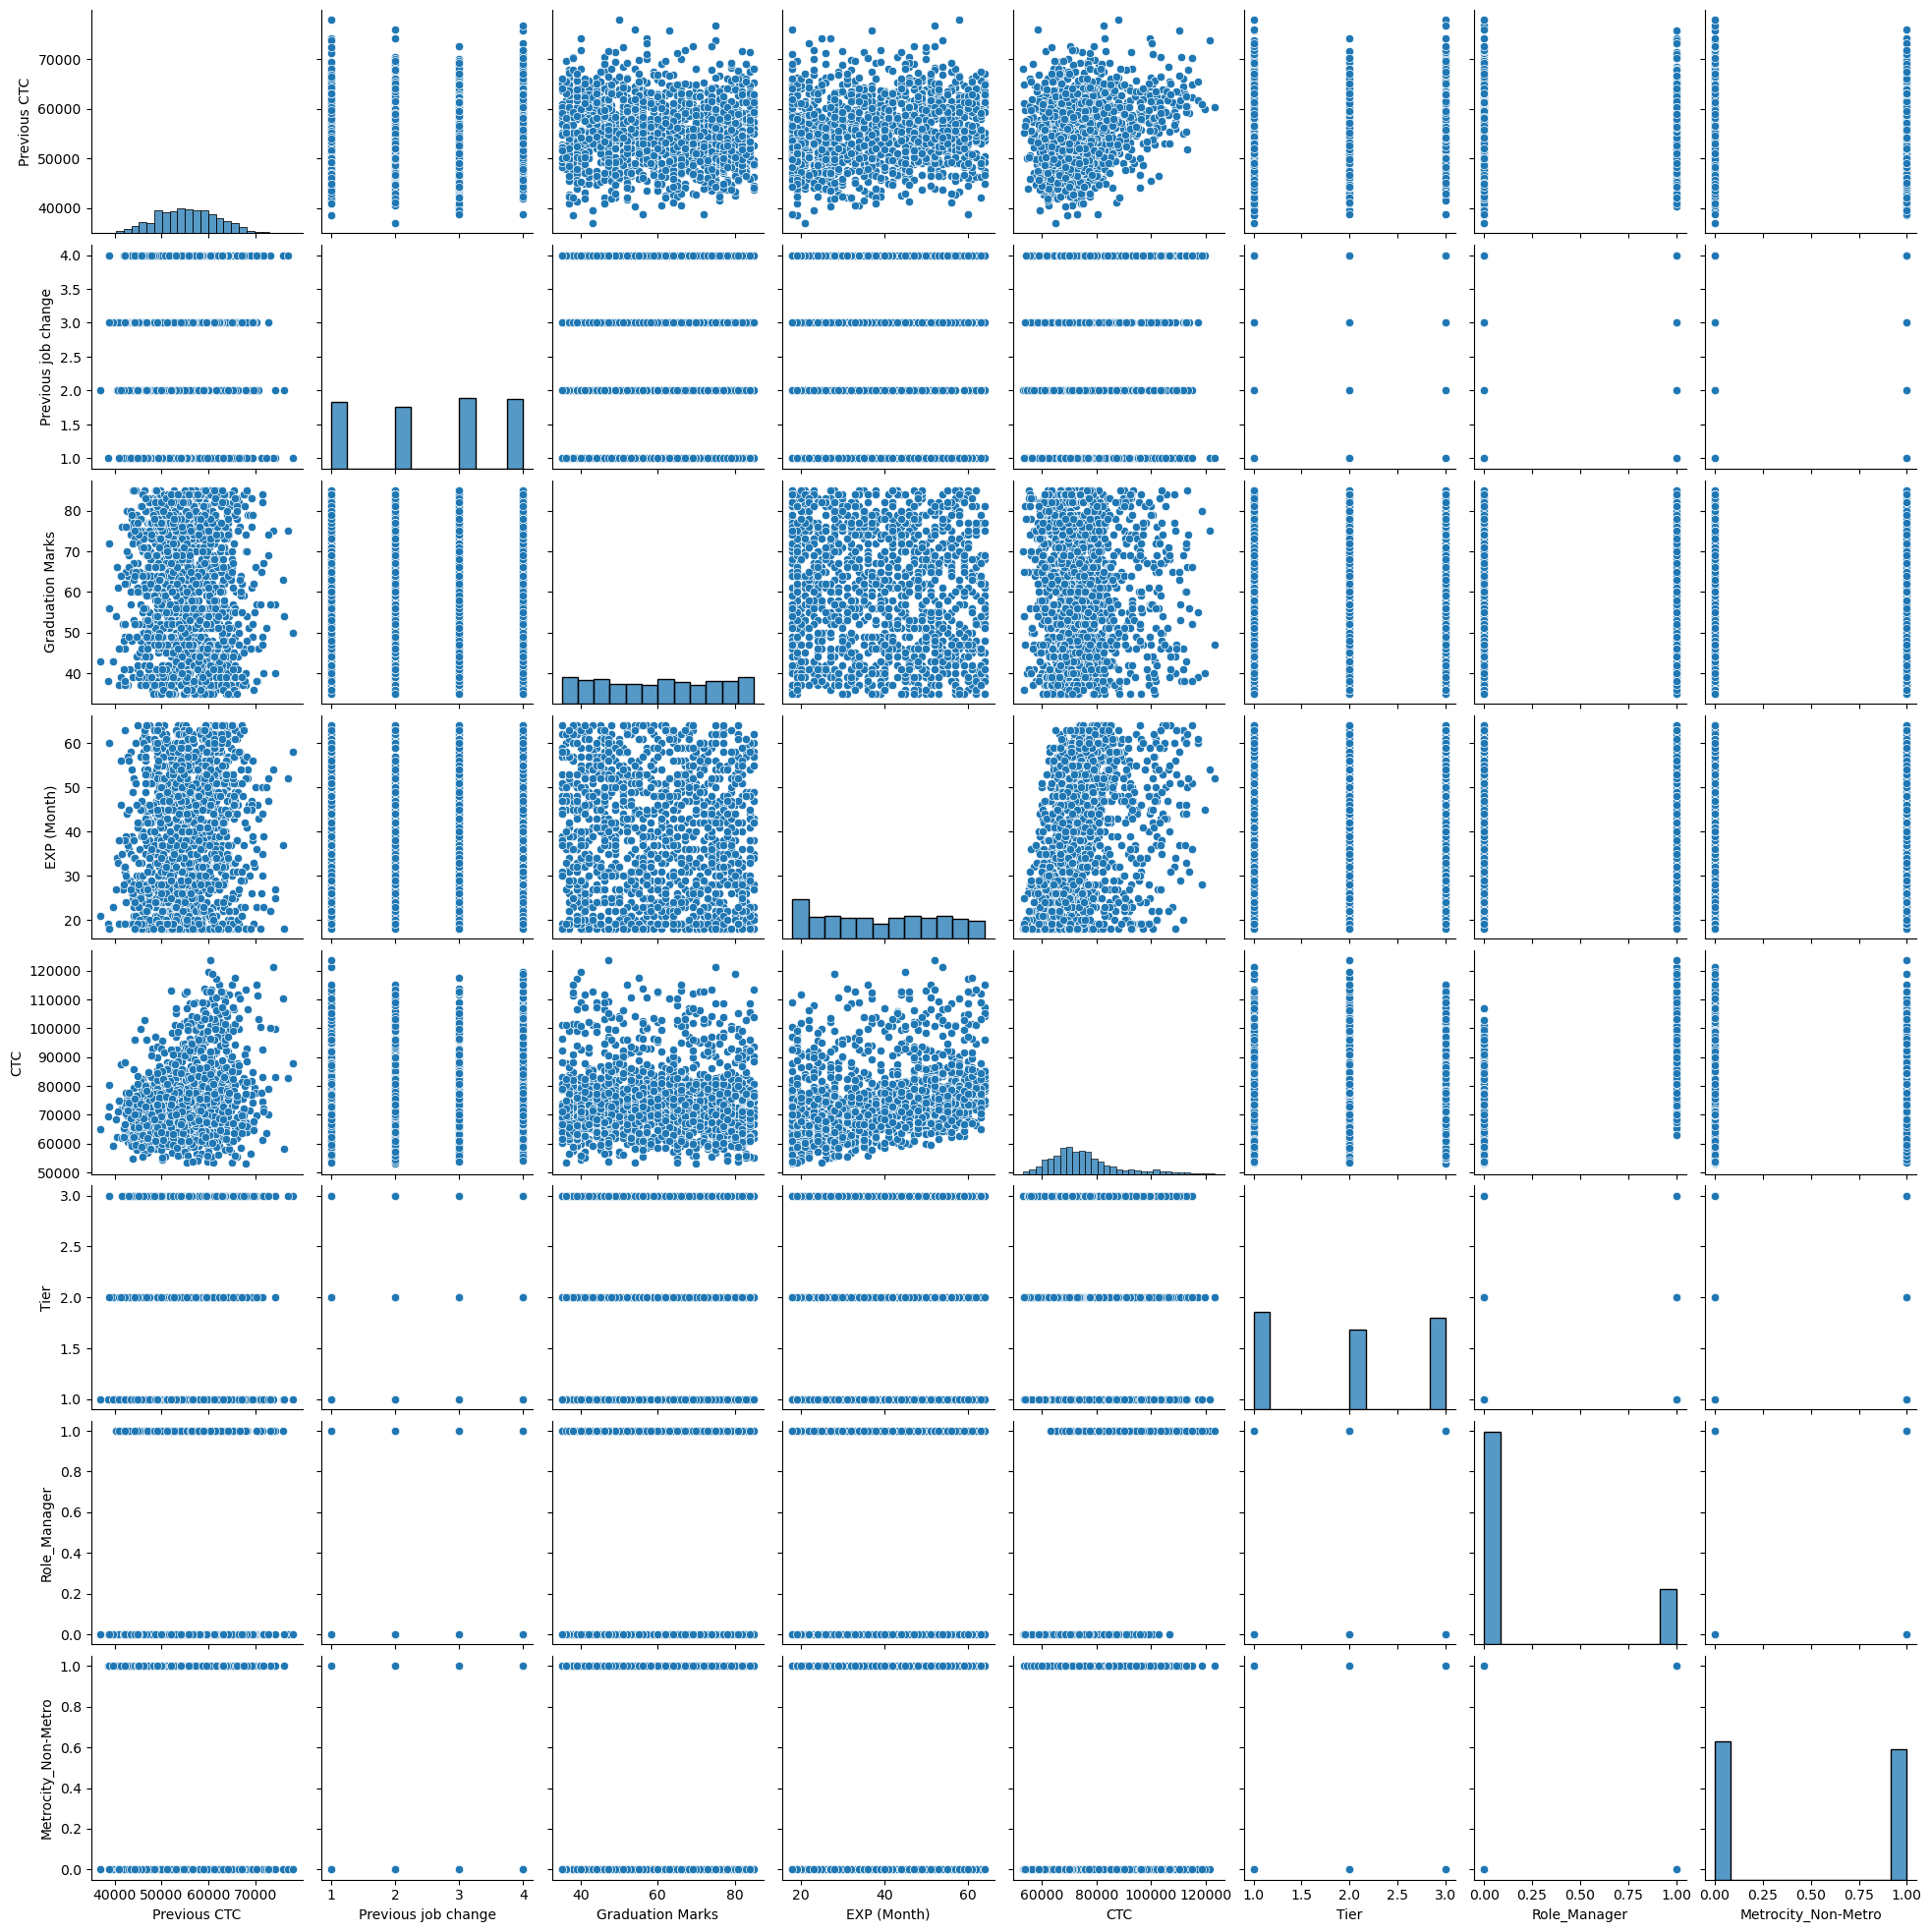

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df_emp1)
plt.show()

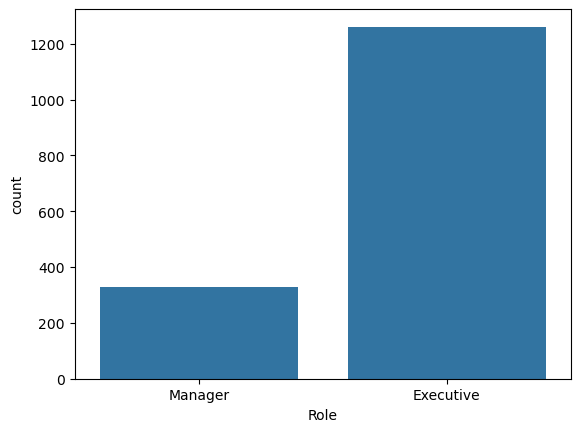

In [40]:
sns.countplot(x = df_emp['Role'])
plt.show()

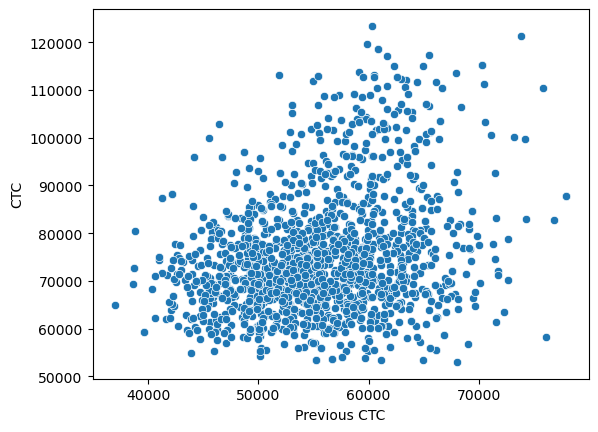

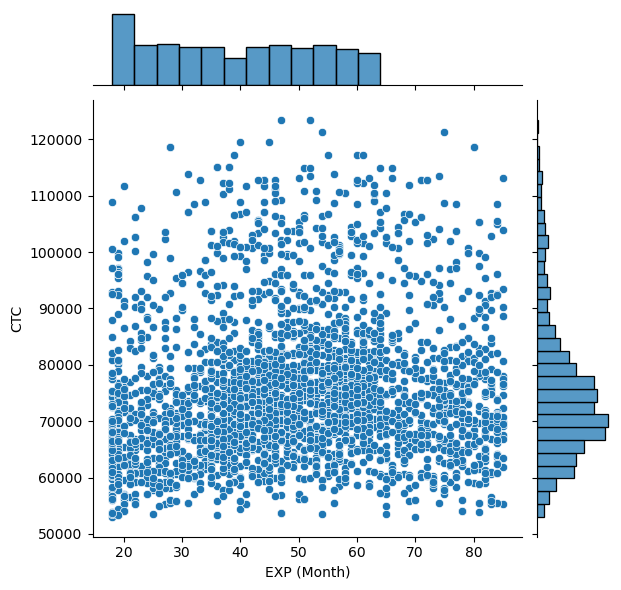

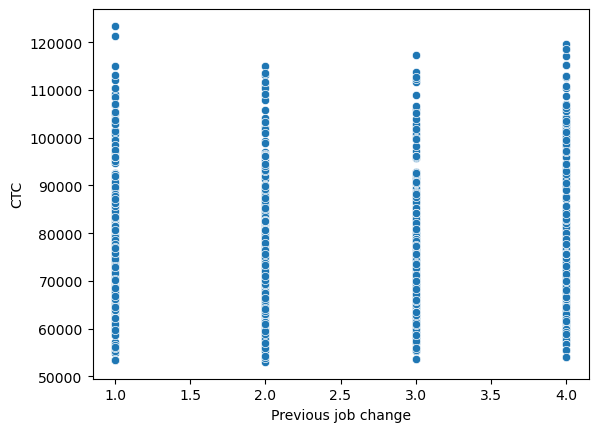

In [41]:
sns.scatterplot(x = df_emp1['Previous CTC'], y = df_emp1['CTC'])
plt.show()

sns.jointplot(x = df_emp1['EXP (Month)'],y = df_emp1['CTC'])

sns.scatterplot(x = df_emp1['Graduation Marks'], y = df_emp1['CTC'])
plt.show()

sns.scatterplot(x = df_emp1['Previous job change'], y = df_emp1['CTC'])
plt.show()

**x-y split**

In [42]:
x_multi = df_emp1.drop('CTC' , axis = 1)
y_multi = df_emp1['CTC']

In [43]:
print(x_multi.shape, y_multi.shape)

(1589, 7) (1589,)


**Test-Train Split**

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi ,test_size=0.2,random_state=22)

In [46]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1271, 7) (318, 7) (1271,) (318,)


**Model_1 : Multi Linear Regression**

1A. Multi Linear Regression using Statsmodel.api

In [47]:
import statsmodels.api as sn
x_multi_cons = sn.add_constant(x_multi)

In [48]:
x_multi_cons.head()

,const,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Tier,Role_Manager,Metrocity_Non-Metro
0,1.0,55523,3,66,19,2,1,1
1,1.0,57081,1,84,18,2,0,1
2,1.0,60347,2,52,28,3,0,1
3,1.0,49010,2,81,33,3,0,1
4,1.0,57879,4,74,32,1,0,1


In [49]:
lms_multi = sn.OLS(y_multi, x_multi_cons).fit()

In [50]:
lms_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Mon, 30 Sep 2024   Prob (F-statistic):          4.70e-257
Time:                        19:13:52   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 3.88e+04   2190.177     17.716      0.000    3.45e+04    4.31e+04
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5653    192.887      0.656      0.512    -251.776     504.906
Graduation Marks        6.2362     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3444     15.460     16.904      0.000     231.020     291.669
Tier                 -481.5147    258.382     -1.864      0.063    -988.321      25.292
Role_Manager         1.949e+04    534.694     36.446      0.000    1.84e+04    2.05e+04
Metrocity_Non-Metro  -380.8308    433.455     -0.879      0.380   -1231.039     469.377
==============================================================================
Omnibus:                       49.726   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.299
Skew:                           0.408   Prob(JB):                     9.82e-13
Kurtosis:                       3.411   Cond. No.                     5.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1B. Multiple Linear Regression using sklearn library

**Normalization/ Feature Scaling**

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()

In [53]:
x_train_scaled = scaler.fit_transform(x_train)

In [54]:
x_test_scaled = scaler.transform(x_test)

**Linear Regression Method -sklearn**

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
multi_lm = LinearRegression()
multi_lm.fit(x_train_scaled, y_train)

LinearRegression()

In [57]:
y_pred_linear = multi_lm.predict(x_test_scaled)

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
mse_lr = mean_squared_error(y_test ,  y_pred_linear)
r2_lr = r2_score(y_test , y_pred_linear)

In [60]:
print("Mean Squared Error - ",mse_lr,"\nr2 Score -",r2_lr)

Mean Squared Error -  73620819.19801837 
r2 Score - 0.5161546339244217


In [61]:
#We are creating result data so that we can use it in future to identify best results and best method

In [62]:
result = {}

In [63]:
result['Linear Regression'] = {'MSE' : mse_lr, 'R-squared':r2_lr}

**Ridge Regression**

In [64]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
ridge_reg = Ridge()

In [66]:
ridge_reg.fit(x_train_scaled,y_train)

Ridge()

In [67]:
y_pred_ridge = ridge_reg.predict(x_test_scaled)

In [68]:
mse_ridge = mean_squared_error(y_test,y_pred_ridge)
r2_ridge = r2_score(y_test,y_pred_ridge)

In [69]:
print("Mean Squared Error - ",mse_ridge,"\nR2 Score -",r2_ridge)

Mean Squared Error -  73617146.55367416 
R2 Score - 0.5161787710091017


In [70]:
result['Ridge Regression'] = {'MSE' : mse_ridge, 'R-squared':r2_ridge}

**Lasso Regression**

In [71]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
lasso_reg = Lasso()

In [73]:
lasso_reg.fit(x_train_scaled,y_train)

Lasso()

In [74]:
y_pred_lasso = lasso_reg.predict(x_test_scaled)

In [75]:
mse_lasso = mean_squared_error(y_test,y_pred_lasso)
r2_lasso = r2_score(y_test,y_pred_lasso)

In [76]:
print("Mean Squared Error - ",mse_lasso,"\nR2 Score -",r2_lasso)

Mean Squared Error -  73619777.41010164 
R2 Score - 0.5161614806868109


In [77]:
result['Lasso Regression'] = {'MSE' : mse_lasso, 'R-squared':r2_lasso}

**Decision Tree Regression**

In [78]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
tree_reg = DecisionTreeRegressor()

In [80]:
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [81]:
y_pred_tree = tree_reg.predict(x_test)

In [82]:
mse_tree = mean_squared_error(y_test,y_pred_tree)
r2_tree = r2_score(y_test,y_pred_tree)

In [83]:
print("Mean Squared Error - ",mse_tree,"\nR2 Score -",r2_tree)

Mean Squared Error -  115944531.56620817 
R2 Score - 0.23799782546261805


In [84]:
result['Tree Regression'] = {'MSE' : mse_tree, 'R-squared':r2_tree}

**Random Forest Mehtod**

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [86]:
rand_reg = RandomForestRegressor()

In [87]:
rand_reg.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [88]:
y_pred_rand = rand_reg.predict(x_test_scaled)

In [89]:
mse_rand = mean_squared_error(y_test,y_pred_rand)
r2_rand = r2_score(y_test , y_pred_rand)

In [90]:
print("Mean Squared Error - ",mse_rand,"\nR2 Score -",r2_rand)

Mean Squared Error -  62306426.812016346 
R2 Score - 0.59051425645461


In [91]:
result['Random Forest Regressor'] = {'MSE' : mse_rand, 'R-squared':r2_rand}

**Gradient Boosting Method**

In [92]:
from sklearn.ensemble import GradientBoostingRegressor

In [93]:
gb_regtree = GradientBoostingRegressor()
gb_regtree.fit(x_train_scaled, y_train)

GradientBoostingRegressor()

In [94]:
y_pred_gra = gb_regtree.predict(x_test_scaled)

In [95]:
mse_gra = mean_squared_error(y_test,y_pred_gra)
r2_gra = r2_score(y_test , y_pred_gra)

In [96]:
print("Mean Squared Error - ",mse_gra,"\nR2 Score -",r2_gra)

Mean Squared Error -  60796699.55079775 
R2 Score - 0.6004363755961238


In [97]:
result['Gradient Boosting Regressor'] = {'MSE' : mse_gra, 'R-squared':r2_gra}

**Creating Result data with all the result values**

In [98]:
result_df = pd.DataFrame(result).T

In [99]:
print(result_df)

                                      MSE  R-squared
Linear Regression            7.362082e+07   0.516155
Ridge Regression             7.361715e+07   0.516179
Lasso Regression             7.361978e+07   0.516161
Tree Regression              1.159445e+08   0.237998
Random Forest Regressor      6.230643e+07   0.590514
Gradient Boosting Regressor  6.079670e+07   0.600436


**Best Method Finding**

In [100]:
#Best Model Based on R-Squared Value

In [101]:
best_model_name = result_df['R-squared'].idxmax()

In [102]:
best_model_r2 = result_df.loc[best_model_name, 'R-squared']

In [103]:
print(f'The Best Model Based On R-squared Value is {best_model_name} with r2_value is {best_model_r2:.4f}')

The Best Model Based On R-squared Value is Gradient Boosting Regressor with r2_value is 0.6004


**Additional Questions**

**1.Your views about the problem statement?**

**ANSWER:** The task at hand is to develop a machine learning model that can predict the salary of potential new hires at TechWorks Consulting. This model will be used to streamline the recruitment process by providing an initial estimate of a candidate's expected salary based on their qualifications and experience. The model will take into account various features that are believed to influence employee compensation, such as:

* Educational Background: The college or university a candidate attended, potentially categorized by tier (Tier1, Tier2, Tier3) to reflect the reputation and prestige associated with the institution.
* Location: The city where the candidate resides, potentially encoded as a numerical value (Metro = 1, Non-Metro = 0) to capture any cost-of-living differences that might affect salary expectations.
* Job Role: The specific position the candidate is applying for (e.g., Manager, Executive), represented using dummy variables to account for the varying salary ranges associated with different roles.
* Experience: The candidate's total work experience in months, which is likely to have a positive correlation with salary.
* Previous CTC (Cost to Company): The candidate's compensation in their previous job, which can serve as a benchmark for their current salary expectations.
* Academic Record: The candidate's academic performance, potentially measured by graduation marks, which could indicate their potential and skills.

By analyzing these features and their relationships with actual employee salaries, the machine learning model can learn patterns and make predictions about the compensation that would be appropriate for new hires with similar profiles. This can be a valuable tool for TechWorks Consulting to make more informed decisions during the recruitment process, ensuring they offer competitive salaries while staying within budget constraints.traints.

**2.What will be your approach to solving this task?**

**Step1 - Data Preprocessing:**

* Categorical Encoding: Convert categorical features like "College Name" and "City" into numerical data:
Assign numerical values to college tiers (Tier1 = 3, Tier2 = 2, Tier3 = 1).
Encode city type (Metro = 1, Non-Metro = 0).
* Dummy Variables: Create dummy variables for the "Role" feature using one-hot encoding to capture the effect of different roles on salary.
* Outlier Detection and Handling: Identify and address outliers in numerical features like "Previous CTC" and "Experience in Months" using techniques like z-scores or IQR (Interquartile Range). Choose a suitable method (winsorization, capping, or removal) for handling outliers based on their impact and business context.
* Missing Value Imputation: Handle missing values in any features using techniques like mean/median imputation or more advanced methods like k-Nearest Neighbors (KNN) imputation, considering the nature of the missing data and the feature itself.

**step2 - Feature Selection:**

Employ feature selection techniques like correlation analysis, feature importance from Random Forest, or Lasso regularization to identify the most relevant features for salary prediction. This helps reduce model complexity and potentially improves accuracy.

**step3 - Model Training and Evaluation:**

* Model Selection: Train and evaluate various regression models including Linear Regression, Ridge Regression, Lasso Regression, Decision Tree Regression, Random Forest Regression, Gradient Boosting, and XGBoost.
* Model Evaluation: Use metrics like Mean Squared Error (MSE), R-Squared (R²), and Adjusted R-Squared to compare model performance.

**step5 - Model Tuning:**

After selecting the best performing model, fine-tune its hyperparameters (e.g., regularization parameters for Ridge or Lasso, number of trees and max depth for Random Forest) to improve prediction accuracy.

**3.What ML model options did you have available to perform this task?**

The available options include:

**Linear Regression:** Baseline model for understanding linear relationships between features and salary.

**Ridge Regression:** Addresses multicollinearity by penalizing large coefficients, potentially improving generalization.

**Lasso Regression:** Performs feature selection by shrinking coefficients to zero, leading to a sparse model with fewer features.

**Decision Tree Regression:** Non-linear model that captures complex relationships between features.

**Random Forest Regression:** Ensemble of decision trees, reducing variance and improving generalization.

**Gradient Boosting Machine Regressor:** Sequential ensemble model that improves on decision trees by focusing on past errors.

**4.Which model’s performance is best and what could be the possible reason for that?**

Accuracies or R2_scores of ML models:-
* Linear Regression - 0.5161546339244217
* Ridge Regression - 0.5161787710091017
* Lasso Regression - 0.5161787710091017
* Decision Tree Regression - 0.24404361165392074
* Random Forest Regression - 0.5862245237470753
* **Gradient Boosting Machine Regressor -  0.6008800484001711**

Based on the provided information, **Gradient Boosting Machine Method achieved the highest accuracy (R²: 0.6008)**. 

Here's a possible explanation:
Gradient Boosting Machine (GBM) achieves high accuracy by sequentially building models that correct the errors of previous ones, focusing on the hardest-to-predict cases1. This iterative approach refines predictions and minimizes overall error

**5.What steps can you take to improve this selected model’s performance even further?**

Here are ways to further enhance the selected model (Random Forest):

* **Hyperparameter Tuning:** Optimize hyperparameters like "number of trees" and "max depth" using techniques like GridSearchCV or RandomizedSearchCV to find the best configuration for your data.
* **Feature Engineering:** Explore creating new features based on existing ones (e.g., interaction terms) to capture potential relationships missed by the original features.
* **Data Augmentation:** If data permits, consider techniques like SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance if present, especially for categorical features like "Role."
* **Model Ensembling:** Combine predictions from multiple Random Forest models with different hyperparameters or even other regression models using techniques like bagging or stacking to potentially improve overall accuracy.
* **Model Evaluation with Different Metrics:** Consider using additional metrics beyond R², like Mean Absolute Error (MAE) or explained variance (adjusted R²), depending on the desired interpretation of errors (absolute vs. squared) or the importance of capturing the variance in salary predictions.

By implementing these steps, you can potentially improve the accuracy and generalizability of the salary prediction model for TechWorks Consulting. Remember to continually monitor and evaluate the model's performance as new data becomes available.